## Travail personnel

On commence par importer les modules Python nécessaires :

In [4]:
import numpy as np
import scipy
from scipy import linalg
from matplotlib import pyplot
%matplotlib inline

Afin de résoudre l'équation, on peut introduire une grille 1D comme suit :

In [6]:
N=101
L=1.0
y=np.linspace(-L,L,N)
dy=2*L/(N-1)

**Question 1: (2 points)**

Pour $\hat{v}'$, le problème contient 4 conditions aux bords. Les conditions du type Dirichlet se traduisent par: v[0]=0 et v[N-1]=0.

En vous servant du lien, https://en.wikipedia.org/wiki/Finite_difference_coefficient, déterminer comment se traduisent les conditions du type von Neumann $\frac{\partial v}{\partial y}(y=-1)=\frac{\partial v}{\partial y}(y=1)=0$ si on adopte une "forward finite difference" du second ordre pour la dérivée première sur le bord $y=-1$ et une "backward finite difference" du second ordre pour la dérivée première sur le bord $y=1$.

**Réponse:**


En adoptant  une "forward finite difference" du second ordre pour la dérivée première sur le bord $y=-1$ on obtient l'expression suivante:

<p>&nbsp;</p>

<center><span style="font-size:1.3em;"> $\frac{\partial v}{\partial y}(y=-1)\approx\frac{-\frac{3}{2}v[0] \: + \:     2v[1] \: -\:\frac{1}{2}v[2] }{h_{y}} + O\left(h_{y}^2  \right)=0$ </span></center>
<p>&nbsp;</p>

Pour la dérivée première sur le bord $y=1$ en "backward finite difference" du second ordre on obtient l'expression:
<p>&nbsp;</p>

<center><span style="font-size:1.3em;"> $\frac{\partial v}{\partial y}(y=1)\approx\frac{\frac{3}{2}v[N-1]\: - \:2v[N-2] \: +\:\frac{1}{2}v[N-3] }{h_{y}} + O\left(h_{y}^2  \right)=0$ </span></center>
<p>&nbsp;</p>
Les conditions de  Dirichlet $v[0]=0=v[N-1]$ nous permettent alors d'obtenir les relations suivantes:
<p>&nbsp;</p>
<center><span style="font-size:1.3em;"> $\frac{0 \: + \: 2v[1] \: - \: \frac{1}{2}v[2] }{h_{y}} =0$ </span></center>
<p>&nbsp;</p>
<center><span style="font-size:1.3em;"> $\frac{0\:  - \: 2v[N-2] \: + \: \frac{1}{2}v[N-3] }{h_{y}} =0$ </span></center> 

c'est-à-dire
<p>&nbsp;</p>

<center><span style="font-size:1.1em;"> $v[1]=\frac{1}{4}v[2] $ </span></center>
<p>&nbsp;</p>
                   
<center><span style="font-size:1.1em;"> $v[N-2]=\frac{1}{4}v[N-3] $ </span></center>

De la question précédente, on déduit que la discrétisation de $\hat{v}'$ ne contient que $N-4$ valeurs indépendantes et qu'on peut dès lors définir numériquement:

In [8]:
v=np.empty(N-4)

**Question 2: (3 points)**

En tenant compte de votre réponse à la question 1, compléter la routine suivante afin qu'elle retourne une discrétisation de l'opérateur $D^2$ du type "central finite difference" valable à l'ordre 2 et qui agit sur les valeurs indépendantes de ${\hat v}'$.

**Réponse:**

La discrétisation voulue est 
<center><span style="font-size:1.5em;"> $\frac{\partial^2 v[i]}{\partial y^2}\approx\frac{v[i-1] \: -\: 2v[i] \: + \:v[i+1]}{h_{y}^2}$  </span></center>
<p>&nbsp;</p>
Elle est applicable en tout indice de v, sauf en v[0] et en v[N-1] ou nous devons utiliser les relations obtenues précédemment, on obtient ainsi
<p>&nbsp;</p>
<center><span style="font-size:1.5em;"> $\frac{\partial^2 v[0]}{\partial y^2}\approx\frac{\frac{1}{4}v[0] \: - \: 2v[0] \: + \: v[1]}{h_{y}^2}=\frac{\frac{-7}{4}v[0] \: + \:v[1]}{h_{y}^2}$  </span></center> 
et
<center><span style="font-size:1.5em;"> $\frac{\partial^2 v[N-1]}{\partial y^2}\approx\frac{\frac{1}{4}v[N-1] \: - \: 2v[N-1] \: + \: v[N-2]}{h_{y}^2}=\frac{\frac{-7}{4}v[N-1] \: + \: v[N-2]}{h_{y}^2}$  </span></center> 


Pour évaluer la dérivée simultanément en plusieurs point d'une fonction discrétisée  on utilise la représentation matricielle de $D^{2}$ en l'appliquant au vecteur contenant les dits points. Dans notre cas on a donc:


\begin{equation*}
D^{2}\vec{v} = \frac{1}{h_{y}^2} 
\begin{pmatrix}
-\frac{7}{4} & 1 & & &\Huge 0\\
1 & -2 & 1 & & \\
  & \ddots & \ddots & \ddots & \\
 & & 1 & -2 & 1  \\  
\Huge 0 & & & 1 & \frac{-7}{4} 
\end{pmatrix}
\vec{v}
\end{equation*}

In [9]:
# Operateur dérivée seconde de y agissant sur v   
def D2_v(N,dy):
    
    # diagonale de l'opérateur.
    D = np.diag((-2.0) * np.ones(N-4))     
    # diagonale "supérieure" de l'opérateur.
    U = np.diag(np.ones(N - 5), k=1)
    # diagonale "inférieure" de l'opérateur.
    L = np.diag(np.ones(N - 5), k=-1)
    
    D2 = D + U + L

    #  conditions de Neumann  
    D2[-1, -1] = (-7.0/4.0) 
    D2[0, 0] = (-7.0/4.0) 
    
    D2 = D2/(dy**2)  
    return D2

**Question 3: (3 points)** 

Faites de même pour l'opérateur de dérivée 4ème, $D^4 = \frac{\partial^4}{\partial y^4}$ en complétant la routine suivante afin qu'elle retourne une discrétisation de l'opérateur $D^4$ du type "central finite difference" valable à l'ordre 2 et qui agit sur les valeurs indépendantes de ${\hat v}'$.

**Réponse:**

La discrétisation voulue est 
<center><span style="font-size:1.5em;"> $\frac{\partial^4 v[i]}{\partial y^4}\approx\frac{v[i-2] \: - \: 4v[i-1] \: + \: 6v[i] \: - \: 4v[i+1] \: + \: v[i+2]}{h_{y}^2}$  </span></center>
<p>&nbsp;</p>

Elle est applicable directement en tout indice de v, sauf en v[0],v[1],v[N-1]et v[N-2] où nous devons utiliser les relations obtenues précédemment, on obtient ainsi 
<p>&nbsp;</p>

<center><span style="font-size:1.5em;"> $\frac{\partial^4 v[0]}{\partial y^4}\approx\frac{0 \:  - \: 4\frac{1}{4}v[0] \: + \: 6v[0] \: - \: 4v[1] \: + \: v[2]}{h_{y}^4}=\frac{5v[0] \: -4v[1] \: + \: v[2]}{h_{y}^4}$  </span></center> 
<center><span style="font-size:1.5em;"> $\frac{\partial^4 v[1]}{\partial y^4}\approx\frac{\frac{1}{4}v[0] \: - \: 4v[0] \: + \: 6v[1] \: - \: 4v[2] \: + \: v[3]}{h_{y}^4}=\frac{-\frac{15}{4}v[0] \: + \: 6v[1] \: - \: 4v[2] \: + \: v[3]}{h_{y}^4}$  </span></center>

<center><span style="font-size:1.5em;"> $\frac{\partial^4 v[N-1]}{\partial y^4}\approx\frac{v[N-3] \: - \: 4v[N-2] \: + \: 6v[N-1] \: - \: 4\frac{1}{4}v[N-1] \: + \: 0}{h_{y}^4}=\frac{v[N-3] \: - \: 4v[N-2] \: + \: 5v[N-1]}{h_{y}^4}$  </span></center> 
<center><span style="font-size:1.5em;"> $\frac{\partial^4 v[N-2]}{\partial y^4}\approx\frac{v[N-4] \: - \: 4v[N-3] \: + \: 6v[N-2] \: - \: 4v[N-1] \: + \: \frac{1}{4}v[N-1]}{h_{y}^4}=\frac{v[N-4] \: -  \: 4v[N-3] \: + \: 6v[N-2] \: - \: \frac{15}{4}v[N-1]}{h_{y}^4}$  </span></center>

<p>&nbsp;</p>


La représentation matricielle donne ici:


\begin{equation*}
D^{4}\vec{v} = \frac{1}{h_{y}^4} 
\begin{pmatrix}
5 & -4 & 1 &  & & &\Huge 0\\
-\frac{15}{4} & 6 & -4 & 1 & \\
 1 & -4 & 6 & -4 & 1  & & \\
  & \ddots& \ddots & \ddots & \ddots & \ddots & \\  
  & & 1 & -4 & 6 & -4 & 1\\  
 & & & 1 & -4 &  6 & -\frac{15}{4}\\
\Huge 0 &  &  &  & 1 & -4 & 5\\
\end{pmatrix}
\vec{v}
\end{equation*}


In [10]:
# Operateur dérivée quatrième de y agissant sur v 
def D4_v(N,dy):
    
    # diagonale de l'opérateur.
    D = np.diag(6.0 * np.ones(N-4))            
    # diagonales "supérieures" de l'opérateur.
    U = np.diag(-4.0 * np.ones(N - 5), k=1)
    U2 = np.diag(np.ones(N - 6), k=2)
    # diagonales "inférieures" de l'opérateur.
    L = np.diag((-4.0) * np.ones(N - 5), k=-1)
    L2 = np.diag(np.ones(N - 6), k=-2)        
    
    D4 = D + U + L + U2 + L2
    
    # conditions de Neumann  
    D4[-1, -1] = 5.0 
    D4[0, 0] = 5.0 
    D4[1, 0] = -15.0/4.0
    D4[-2, -1] = -15.0/4.0
    D4 = D4/(dy**4) 
    return D4

**Question 4: (4 points)** 

En vous servant des routines précédantes, créer une routine qui permet de construire l'opérateur $L$. 

**Réponse:**

Dans l'expression de l'opérateur on retrouve $U''$ et $U$. Or, en un $y$ donné, $U=1-y^2$ et donc $U''=-2$. Pour appliquer l'opérateur sur un vecteur on représente donc $U$ comme une matrice diagonnale avec la valeur $1-y^2$ évaluée au y correspondant du vecteur. Les éléments $\alpha$, $U''$ peuvent être mis sous forme de matrice diagonnale en répétant la même valeur sur la diagonnale, celle ci ne dépendant pas de $y$. Concernant l'inverse de l'opérateur $D^{2}-\alpha^{2}$, étant donné que l'on a sa représentation matricielle il suffit de prendre l'inverse de celle-ci.

In [13]:

# Operateur L
def L_v(N,y,dy,R,alpha):
    
    #on créé les opérateurs D2 et D4 correspondant
    D2= D2_v(N,dy)
    D4= D4_v(N,dy)
    #on met alpha sous forme de matrice diagonale avec alpha sur la diagonale
    Ma= alpha*np.identity(N-4)
    #on met y sous forme de matrice diagonale avec y sur la diagonale
    My= np.diag(y)
    #on définit la matrice identité
    I = np.identity(N-4)
    #on sépare L en deux facteurs pour plus de clareté et on calcule ensuite leur produit pour avoir L
    La= -1j*alpha*np.matmul(I-My**2,D2-Ma**2) + 1j*(-2.0)*Ma + 1/R*(D4 - 2*(alpha**2)*D2 + (Ma**4))
    #inversion de l'opérateur D2-Ma**2
    Lb= np.linalg.inv(D2-Ma**2)
    L = np.matmul(Lb,La)
    return L  

**Question 5: (2 points)** 

En utilisant un algortihme RK4 dans le temps (https://en.wikipedia.org/wiki/Runge–Kutta_methods#The_Runge–Kutta_method) et un pas de temps de $dt=0.01$, calculer la valeur de ${\hat v}'$ en $y=0.5$ pour un temps final de $10s$ à partir de la condition initiale suivante,

\begin{align}
{\hat v}'(y) = 0.02*(1+cos(\pi y))
\end{align}

On choisit commme paramêtres, $R=500$ et $\alpha=0.3$.

*Solution: ${\hat v}'(0.5)=0.00772852-0.01239437i$.*

**Réponse:**


In [15]:

#on implémente la méthode Runge Kutta d'ordre 4
def RK4(v0,alpha):
    v=np.copy(v0)
    #On calcule L
    L=L_v(N,y,dy,R,alpha)
    k1=np.empty(N-4,dtype=complex)
    k2=np.empty(N-4,dtype=complex)
    k3=np.empty(N-4,dtype=complex)
    k4=np.empty(N-4,dtype=complex)
    #On répète 1000 fois la procédure car t/dt = 1000
    for m in range(1000):
        #On calcule... k1 = L.v
        k1=dt*np.matmul(L,v)
        #k2 = L.(v + (k1/2).dt) car k2 = dt.(L.(v/dt + k1/2))
        k2=dt*np.matmul(L,v + 0.5*k1)
        #k3 = L.(v + (k2/2).dt) car k3 = dt.L.(v/dt + k2/2)
        k3=dt*np.matmul(L,v + 0.5*k2)  
        #k4 = L.(v + k3.dt) car k4 = dt.L.(v/dt + k3)
        k4=dt*np.matmul(L,v + k3)
        #Donc on obtient notre v avec la formule...
        v= v + (1.0/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return v

#on enlève temporairement les valeurs de y qui sont dépendantes des autres valeurs ou constantes
y=np.linspace(-L+0.04,L-0.04,N-4)

#On pose nos paramètres
alpha=0.3
R=500.0
dt=0.01

#On introduit les valeurs initiales
v=np.empty(N-4)
for i in range(N-4):    
    v[i]=0.02*(1.0+np.cos(np.pi*y[i]))
    
solution=RK4(v,alpha)  

#y=0.5 correspond à l'indice 73 du vecteur y modifié
print(solution[73])
    

(0.00772852356078-0.0123943693824j)


**Question 6: (1 point)** 

calculer le propagateur $X$ à l'instant $t=10$ pour les mêmes valeurs des paramètres que précédemment: $R=500$ et $\alpha=0.3$. Utiliser à nouveau un algorithme RK4 dans le temps et un pas de temps $dt=0.01$.

**Réponse:**


In [31]:
#calcul du propagateur
X=np.identity(N-4)
Xt=RK4(X,alpha) 


**Question 7: (1 point)** 

Vérifier que le propagateur transforme bien la condition initiale de la question 5 en la solution que vous avez obtenue.

**Réponse:**


In [32]:
#vérification
solutionPropagateur=np.matmul(Xt,v)
print(solutionPropagateur[73])

(0.00772852356078-0.0123943693824j)


**Question 8: (2 points)** 

En utilisant la fonction disponible dans numpy, effectuer la décomposition singulière du propagateur obtenu à la question 7 et calculer la plus grande des valeurs sigulières. Faire un graphique de la perturbation optimale correspondante (elle correspond au vecteur d'entrée associé à cette plus grande valeur singulière).

*Solution: s=3.3042383*

**Réponse:**


In [20]:
#calcul valeur singulière max :

#on décompose le propagateur et on obtient 3 vecteurs
u,s,vh = np.linalg.svd(Xt)   
#La  valeur sing. max. est donné dans s, on l'extrait en prenant la plus grande valeur avec np.max() 
ValeurSinguliereMax=np.max(s) 
print(ValeurSinguliereMax)
        



3.30423834148


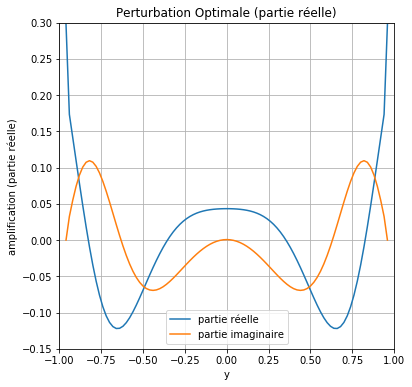

In [24]:
#Pour créer le graphique on trouve le vecteur où se trouve la valeur singulière maximale et on prend son conjugué
indice=np.argmax(s)             
v4=np.conj(vh[indice]) 

#On crée le graphique en de la partie réelle et imaginaire séparée:
pyplot.figure(figsize=(6.0,6.0))
pyplot.title('Perturbation Optimale (partie réelle)')
pyplot.xlabel('y')
pyplot.ylabel('amplification (partie réelle)')
pyplot.grid()
pyplot.plot(y,v4.real , color='C0', label='partie réelle')
pyplot.plot(y,v4.imag,color='C1', label='partie imaginaire')
pyplot.xlim(-1,1)
pyplot.ylim(-0.15, 0.3);
pyplot.legend()

**Question 9: (2 points)** 

En faisant varier $\alpha$ comme paramètre dans le propagateur, écrire un programme qui permet de déterminer la valeur de $\alpha$ qui maximise l'amplification des perturbations à l'instant $t=10$ (toujours avec $R=500$) et en utilisant la même résolution et méthode numérique que précédemment. Faire un graphique de $s$ en fonction de $\alpha$.

## **Réponse:**
Compte tenu du sens physique de alpha on peut commencer par limiter la recherche de alpha qui maximise l'amplification des perturbations à des alpha positifs. En suite nous pouvons utiliser le graphique précédent pour se limiter à un intervalle qui semble contenir le seul maximum (en admettant que que l'amplifiction tend asymptotiquement à 0 avec alpha grandissant).
Nous éssayons une méthode qui "balaye" les valeurs de alpha en diminuant progressivement la valeur ajoutée a alpha.
Nous faison d'abord un graphique approximatif de s en fonction de $\alpha$


In [ ]:
#On écrit la fonction qui sort la perturbation max selon alpha
def ValeurEnFonctionAlpha(alpha):
    #On calcule d'abord la propagateur qui dépend de alpha
    Xt=RK4(X,alpha)
    #On le décompose
    u,s,vh = np.linalg.svd(Xt)
    #On prend la valeur max de s pour avoir la perturbation max
    ValeurSinguliereMax=np.max(s)
    return ValeurSinguliereMax

#On prend des valeurs d'alpha entre 0 et 10 sur 40 points
valeurAlpha=np.linspace(0,10,40)
#On met les valeurs de s correspondantes dans le vecteur Y
Y=[]
for i in valeurAlpha:
    Y.append(ValeurEnFonctionAlpha(i))
#Et créé ainsi le graphique avec ces valeurs
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('Valeur singulière max en fonction de alpha ')
pyplot.xlabel('alpha')
pyplot.ylabel('Valeur singuliere max')
pyplot.grid()
pyplot.plot(valeurAlpha,Y , color='C0')
pyplot.xlim(0,10)
pyplot.ylim(0, 12)



#On cherche le alpha qui maximise la valeur max de s, avec 5 décimales de précision
def AlphaOpti():
    #A la vue du graphique, on démarre le balayage des valeurs à 1,5
    A=1.5
    #On pose la première valeur de s à O pour pouvoir comparer
    sA=0
    Frag = 0
    while Frag ==0:
        #On calcule la valeur max de s pour un alpha auquel on ajoute 0.01
        A = A+ 0.01
        sAi = ValeurEnFonctionAlpha(A)
        #Tant que la valeur de s est plus grande, on recommence la boucle
        if sAi > sA:
            sA = sAi
        #Sinon on en ressort
        else :
            Frag = 1
    #On revient au alpha précédent pour ne pas se tromper
    A = A - 0.01
    #On calcule la valeur de s correspondante por pouvoir la comparer aux autres
    sA = ValeurEnFonctionAlpha(A)
    #Et on recommence la démarche en rajoutant seulement 0.0001 à alpha, puis ensuite 0.00001
    while Frag == 1:
        A = A+0.0001
        sAi = ValeurEnFonctionAlpha(A)

        if sAi >sA:
            sA = sAi
        else:
            Frag = 2
    A = A - 0.0002
    sA = ValeurEnFonctionAlpha(A)
    while Frag == 2:
        A = A + 0.00001
        sAi = ValeurEnFonctionAlpha(A)        
        if sAi >sA:
            sA = sAi
        else:
            Frag = 3
    #Le alpha qui maximise est l'avant-dernier A calculé 
    return (A-0.00001)

print(AlphaOpti())